In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### OverView of Data

In [2]:
# 数据导入
data=pd.read_csv("D:/project/Internet Service Provider Customer Churn/dataset/internet_service_churn.csv",low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


数据无缺失值无需插补
经过网上查阅，col11-col15无用

In [3]:
data['download_avg'] = data['download_avg'].replace(' ', np.nan).astype(float)
data['upload_avg'] = data['upload_avg'].replace(' ', np.nan).astype(float)

data['upload_avg'] = data['upload_avg'].astype(float)
data['download_avg'] = data['download_avg'].astype(float)
# data['download_avg'] = pd.to_numeric(data['download_avg'], errors='coerce')

In [4]:
# 删除无用特征
# data.drop(['id','filter_$','ZRE_1','SRE_1','COO_1','LEV_1'],axis=1,inplace=True)
# data.shape
# data.info()

### Descriptive Analysis

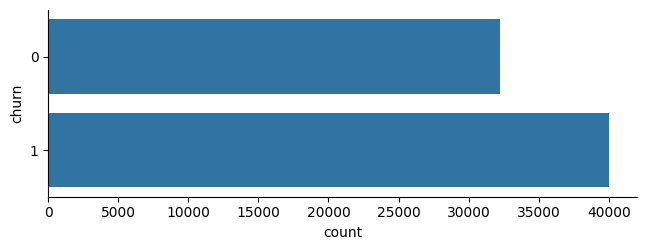

In [5]:
ax=sns.catplot(y="churn",kind="count",data=data,height=2.6, aspect=2.5, orient='h')

初步探索部分数字特征:
- subscription_age
- bill_avg
- reamining_contract
- service_failure_count
- download_avg
- upload_avg
- download_over_limit

In [6]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['churn'] == 0][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['churn'] == 1][feature].dropna(), color= 'orange', label= 'Churn: Yes')
    plt.xlim(data[feature].min(), data[feature].max())  # 根据数据的最小值和最大值自动调整范围


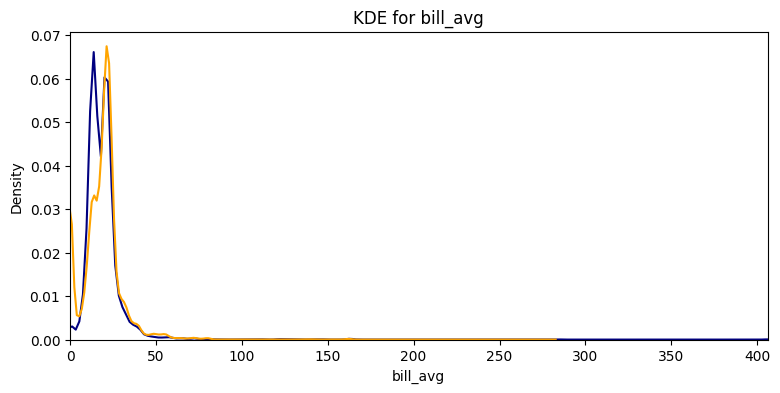

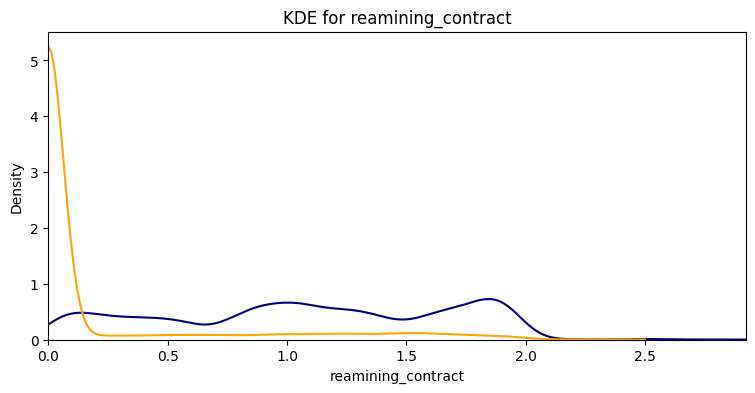

In [7]:
kdeplot('bill_avg')
kdeplot('reamining_contract') # 使用密度图不直观

1. bill_avg:
流失客户过去三个月账单平均值较高
2. reaming_contract:
流失客户明显没有合同

In [8]:
def histplot(feature):#绘制双变量直方图查看订阅年限分布情况
    plt.figure(figsize = (10,6))
    sns.histplot(data = data, x= feature, kde = True, hue = 'churn')
    plt.title(feature+'vs Count')
    plt.show()

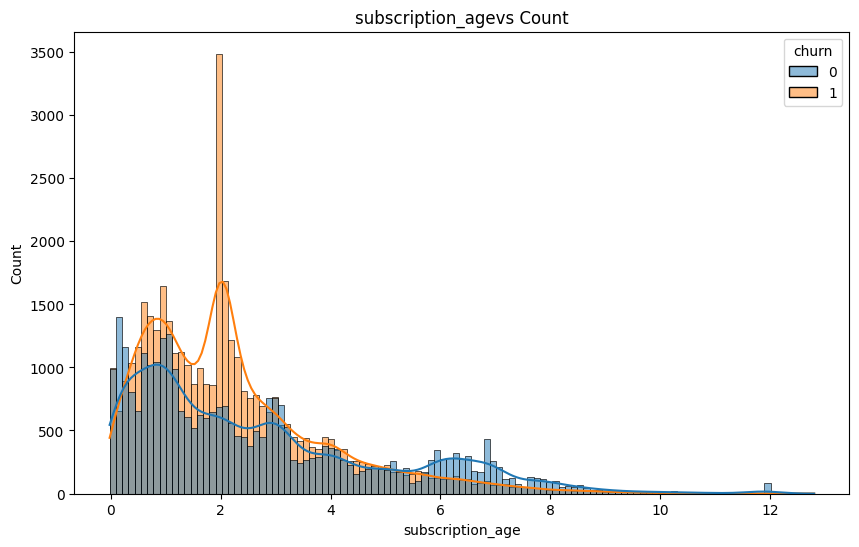

In [9]:
# histplot('bill_avg')
# histplot('reamining_contract')
histplot('subscription_age')

3. subscription_age
客户订阅年限大多集中在1-4年
流失的客户总体订阅年限比未流失客户较高

它的价值在10到40美元之间，但是也有例外，较高的平均账单客户也有非流失者；也有流失者。

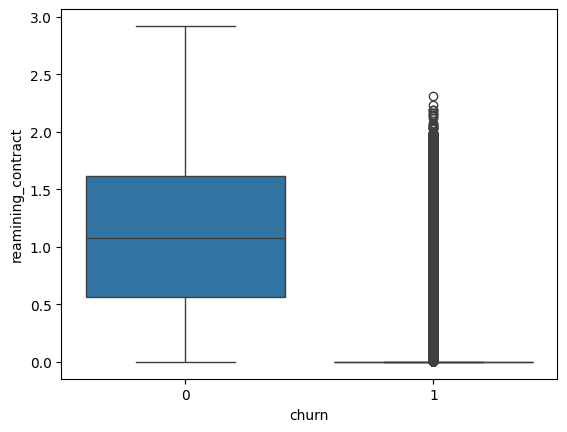

In [10]:
# 用箱线图更直观的看出remaing_contract的分布情况
sns.boxplot(x="churn",y="reamining_contract",data=data)
plt.show() 

那些没有签订合同的客户往往会流失，因为如果他们在签订合同时取消合同，就必须支付违约金。但也有例外，那些签了合同但仍在流失的客户。

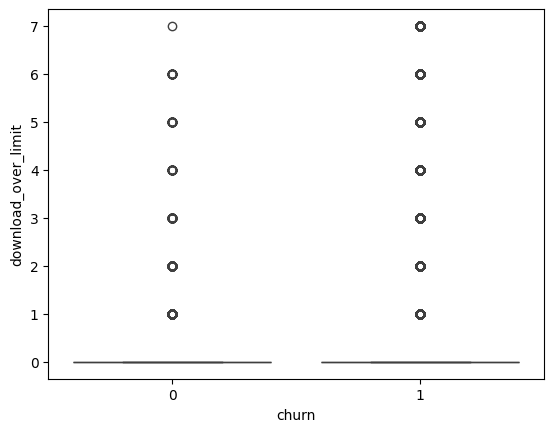

In [11]:
# download_over_limit
sns.boxplot(x="churn",y="download_over_limit",data=data)
plt.show() 

客户对下载超额比较谨慎，但和churn没有太大关系

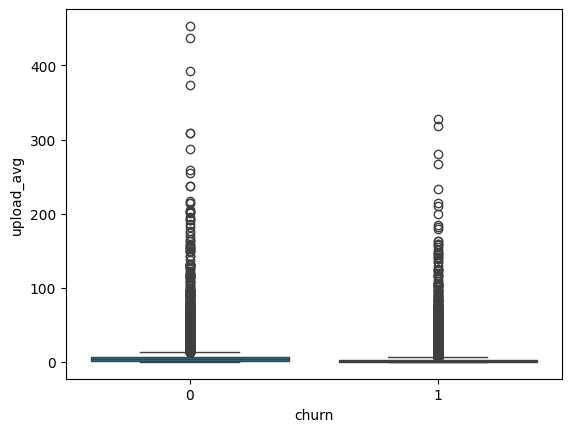

In [12]:
# upload_avg
sns.boxplot(x="churn",y="upload_avg",data=data)
plt.show() 

看出此特征重要性比较低

离散特征：
- is_tv_subscriber
- is_movie_package_subscriber

In [13]:
data.groupby(["is_tv_subscriber",'is_movie_package_subscriber'])[['download_avg','upload_avg',"churn"]].agg('sum') # 按特征分类并统计churn_counts
# gtest2 = g.reset_index()
# g.rename({"churn": "percentage"}, axis=1)

download_avg  upload_avg  churn
is_tv_subscriber is_movie_package_subscriber                                 
0                0                                347380.1     37656.9  11964
                 1                                    83.2         5.7      2
1                0                               1399045.1    131995.1  19891
                 1                               1394490.4    131723.2   8193

只订阅电视不订阅电影的客户流失比率最大
只订阅电影不订阅电视的客户上传下载量最少

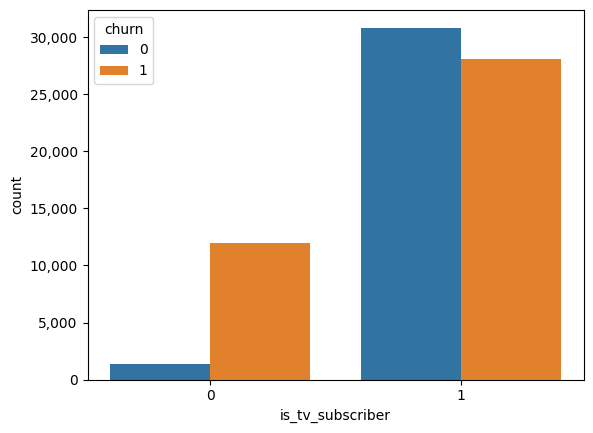

In [14]:
def barplot_percentages(feature, orient='v'):
    ratios = pd.DataFrame()
    g = data.groupby(feature)["churn"].value_counts().to_frame() 
    g = g.reset_index()
    if orient == 'v':
        ax = sns.barplot(x=feature, y= "count", hue='churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= "count", y=feature, hue='churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("is_tv_subscriber")
# barplot_percentages("is_movie_package_subscriber")

可以看出：订阅者客户更不倾向于流失
没有订阅电视的客户更容易流失

#### 订阅者和账单有无相关关系

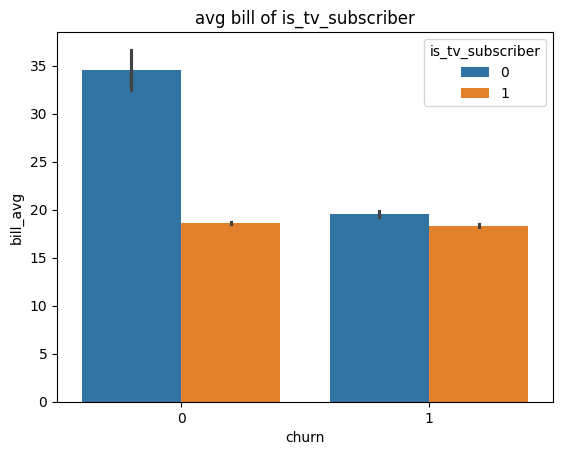

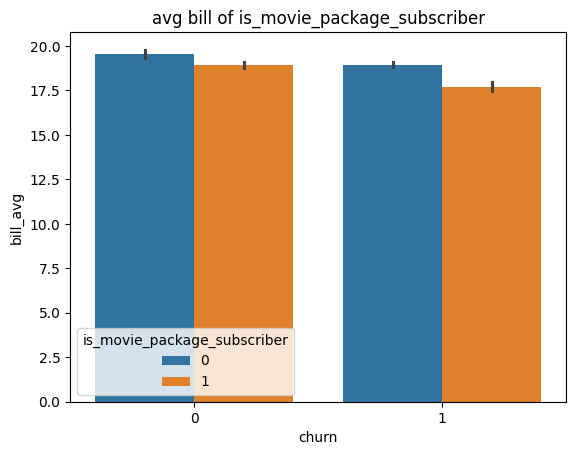

In [15]:
subscribers=["is_tv_subscriber","is_movie_package_subscriber"]
for i in subscribers:
    sns.barplot(x="churn",y="bill_avg",data=data,hue=i)
    plt.title("avg bill of "+ i)
    plt.show()

没有订阅电视or电影套餐的客户账单平均较低

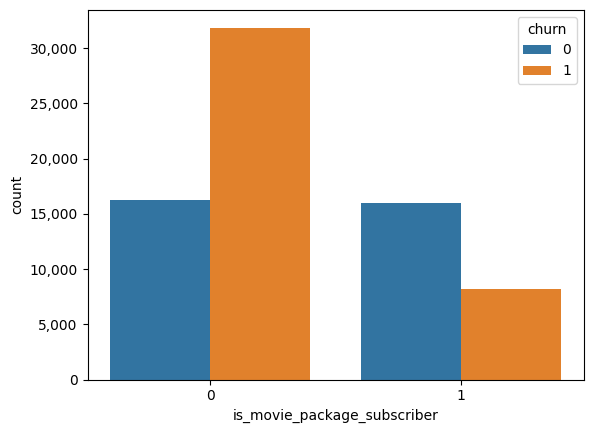

In [16]:
barplot_percentages("is_movie_package_subscriber")


In [17]:
print(data['churn'].head(10))  
#print(data['is_tv_subscriber'].unique())  
#print(data['is_movie_package_subscriber'].unique())

0    0
1    1
2    1
3    1
4    1
5    0
6    1
7    1
8    1
9    1
Name: churn, dtype: int64


明显看出：订阅了电影套餐的客户更不容易流失，和订阅电视的客户相似

data['churn_rate'] = data['churn']
g = sns.FacetGrid(data, col="is_movie_package_subscriber", height=4, aspect=.9)
ax = g.map(sns.barplot, "is_tv_subscriber", "churn_rate", palette = "Blues_d", order= ['0', '1'])


基于单变量的churn_count分析
两离散变量相关性较大

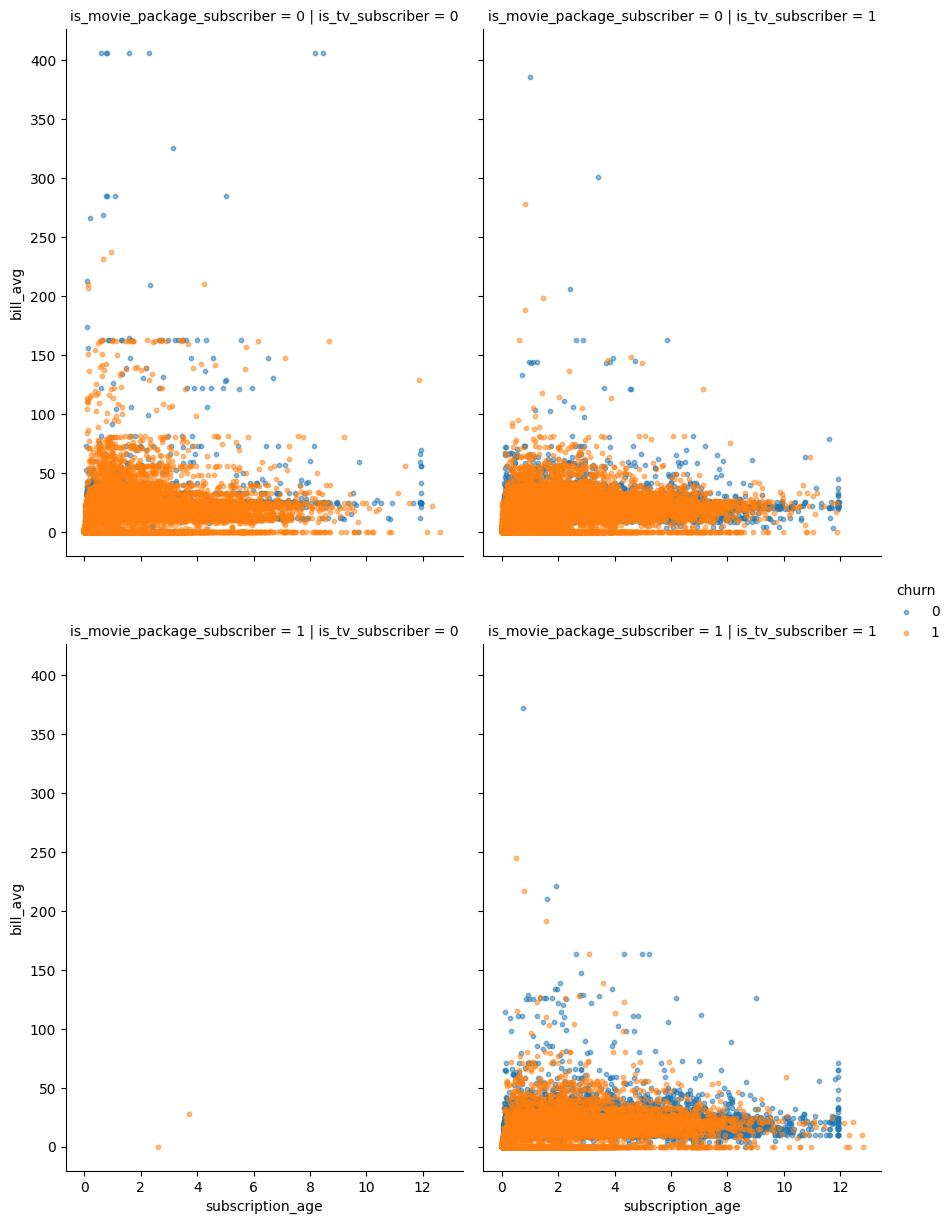

In [18]:
g = sns.FacetGrid(data, row='is_movie_package_subscriber', col="is_tv_subscriber", hue="churn",aspect=1.5, height=3)
g.map(plt.scatter, "subscription_age", "bill_avg", alpha=0.5,s=10)
plt.subplots_adjust(top=2)
g.add_legend();

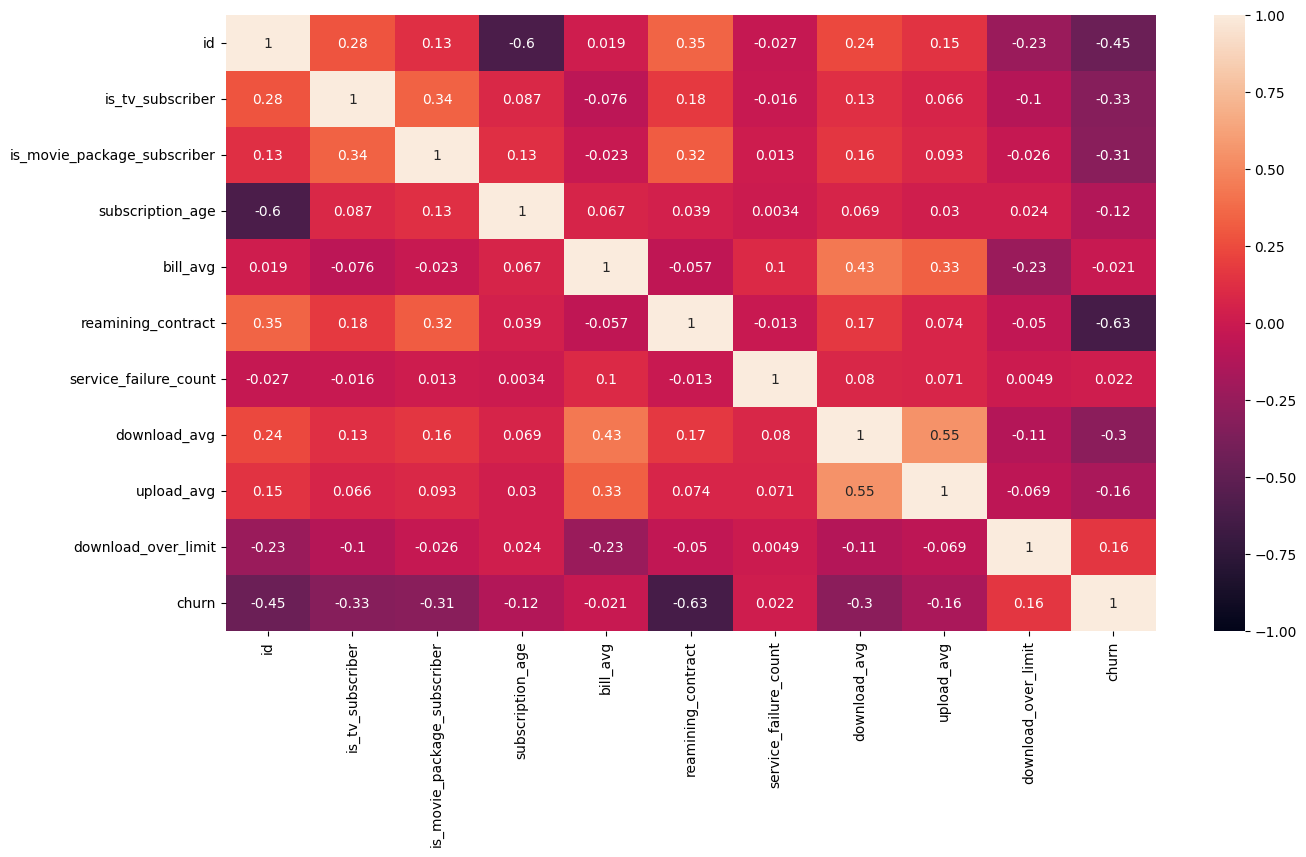

In [19]:
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(correlation,vmin=-1,vmax=1,annot=True)
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegressionCV

data.dropna(axis=0, inplace=True)
# Drop columns with NaN values
data.dropna(axis=1, inplace=True)
data["subscription_age"] = [abs(i) for i in data["subscription_age"]]

# data.drop("churn_rate", axis=1, inplace=True)
X, y = data.iloc[:,:-2], data.iloc[:,-1]
X
y

0        0
2        1
5        0
6        1
10       1
        ..
72269    1
72270    1
72271    1
72272    1
72273    1
Name: churn, Length: 50375, dtype: int64

#### 利用信息增益进行特征选择

In [21]:
from sklearn.feature_selection import mutual_info_classif
important_features =mutual_info_classif(X,y)
feat_importances=pd.Series(important_features,X.columns[0:len(X.columns)])
FI_df = pd.DataFrame({'Feature': X.columns, 'Importance': feat_importances})
FI_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
reamining_contract,reamining_contract,0.434913
download_avg,download_avg,0.122373
upload_avg,upload_avg,0.121147
id,id,0.078757
subscription_age,subscription_age,0.064744
bill_avg,bill_avg,0.056691
is_tv_subscriber,is_tv_subscriber,0.053182
is_movie_package_subscriber,is_movie_package_subscriber,0.044503
service_failure_count,service_failure_count,0.000000


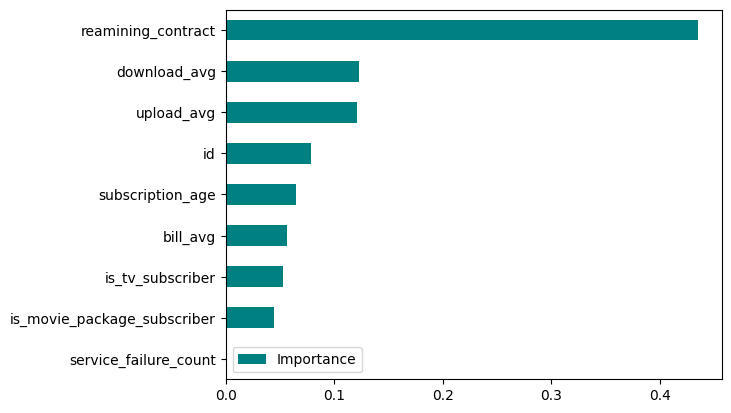

In [22]:
FI_df.sort_values(by='Importance', ascending=True).plot.barh(color="teal");
plt.show()

如图可见：相关性最高的五个特征分别是“remaining_contract”，“download_avg”，“upload_avg”，“bill_avg”和“is_tv_sunscripter”

In [23]:
#特征选择后的数据集数据集
data2 = data.loc[:,["subscription_age","bill_avg","reamining_contract","download_avg","upload_avg","churn"]]
X2 = data2.iloc[:,:-1]
y2 = data2['churn']

#### 模型训练

In [24]:
from sklearn.model_selection import train_test_split
#训练集测试集分割
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.30, random_state = 0)

In [25]:
from imblearn.over_sampling import SMOTE

#使用SMOTE对训练集进行过采样
oversampler = SMOTE(random_state=0)
x_resample, y_resample = oversampler.fit_resample(X_train,y_train)

In [26]:
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('精确率: {:.3f}'.format(tp/(tp+fp)))
    print('召回率: {:.3f}'.format(tp/(tp+fn)))
    print('F1值: {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))))

In [27]:
def plot_confusion_matrix(cm, classes,# 混淆矩阵（二维数组）和类别标签
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap) # 绘制热图，最近邻插值
    plt.title(title)
    plt.colorbar() # 颜色条
    tick_marks = np.arange(len(classes)) # 包含类别标签的索引，用于标记刻度
    plt.xticks(tick_marks, classes, rotation=0) 
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2. # 根据阈值将文本设置为白色或黑色
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):# 双重循环遍历混淆矩阵
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
#使用决策树进行模型训练
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score,f1_score,accuracy_score

#决策树使用网格搜索和交叉验证寻找最优参数
def fit_model_k_fold(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    k_fold = KFold(n_splits=5)
    
    #  Create a decision tree clf object
    clf = DecisionTreeClassifier(random_state=80)

    params = {'max_depth':range(1,21),'criterion':np.array(['entropy','gini'])}

    # Transform 'accuracy_score' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(accuracy_score)

    # Create the grid search object
    grid = GridSearchCV(clf, param_grid=params,scoring=scoring_fnc,cv=k_fold)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

精确率: 0.983
召回率: 0.881
F1值: 0.929


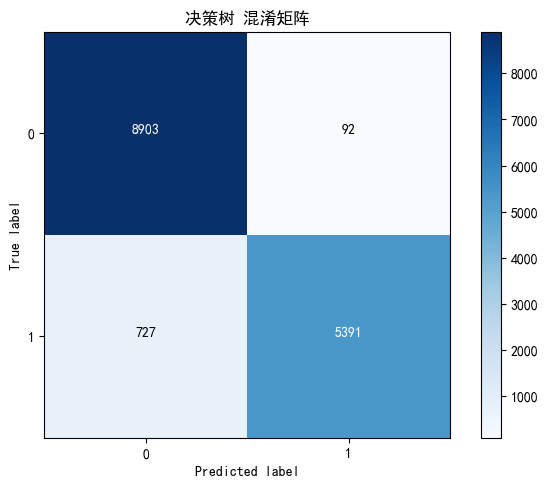

In [29]:
import itertools
from sklearn.metrics import confusion_matrix

#预测训练后的决策树模型
model = fit_model_k_fold(x_resample, y_resample)
y_pred_1 = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred_1)
show_metrics()
plt.rcParams['font.sans-serif'] = ['SimHei']

class_names = [0,1]
plot_confusion_matrix(cm, classes = class_names, title = '决策树 混淆矩阵')

精确率: 0.769
召回率: 0.853
F1值: 0.809


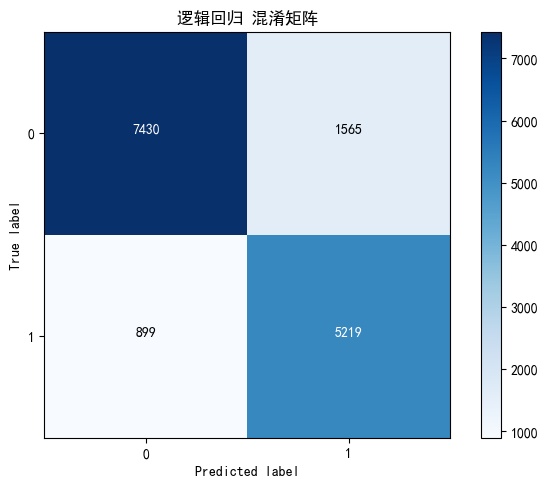

In [30]:
from sklearn.linear_model import LogisticRegression

#逻辑回归使用网格搜索和交叉验证来寻找最优参数
#定义要搜索的超参数网格
penaltys = ['l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solvers = ['newton-cg','lbfgs','liblinear','sag']
tuned_parameters = dict(penalty = penaltys, C = Cs, solver = solvers)

#初始化逻辑回归分类器和网格搜索
lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')

#在训练集上进行网格搜索
grid.fit(x_resample,y_resample)

#使用最佳参数在测试集上进行预测
lr_penalty = grid.best_estimator_
y_pred_2 = lr_penalty.predict(X_test) 

cm = confusion_matrix(y_test,y_pred_2)
show_metrics()
plt.rcParams['font.sans-serif'] = ['SimHei']

class_names = [0,1]
plot_confusion_matrix(cm, classes = class_names, title = '逻辑回归 混淆矩阵')

In [31]:
#使用朴素贝叶斯分类器
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , precision_score

#使用高斯朴素贝叶斯分类器
clf = GaussianNB()
clf.fit(X_train, y_train)
#X_train, X_test, y_train, y_test
clf_p1 = clf.predict(X_test)
acc1 = accuracy_score(y_test,clf_p1)
print("使用高斯朴素贝叶斯分类器的准确率",acc1)

#使用伯努利朴素贝叶斯分类器
clf = BernoulliNB()
clf.fit(X_train, y_train)
#X_train, X_test, y_train, y_test
clf_p2 = clf.predict(X_test)
acc2 = accuracy_score(y_test,clf_p2)
print("使用伯努利朴素贝叶斯分类器的准确率",acc2)

#使用多项式朴素贝叶斯分类器
clf = MultinomialNB()
clf.fit(X_train, y_train)
#X_train, X_test, y_train, y_test
clf_p3 = clf.predict(X_test)
acc3 = accuracy_score(y_test,clf_p3)
print("使用多项式朴素贝叶斯分类器的准确率",acc3)

使用高斯朴素贝叶斯分类器的准确率 0.8195593197909085
使用伯努利朴素贝叶斯分类器的准确率 0.942499834579501
使用多项式朴素贝叶斯分类器的准确率 0.6524184476940382


In [32]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy import optimize
from Bayes_opt import BayesianOptimization


# 确定取值空间
pbounds = {'n_estimators': (50, 250),  # 表示取值范围为10至250
               'min_samples_split': (2, 25),
               'max_features': (0.1, 0.999),
               'max_depth': (5, 12)}

RF_bo = BayesianOptimization(
        f=RF_evaluate,   # 目标函数
        pbounds=pbounds,  # 取值空间
        verbose=2,  # verbose = 2 时打印全部，verbose = 1 时打印运行中发现的最大值，verbose = 0 将什么都不打印
        random_state=1,
)

RF_bo.maximize(init_points=5,   # 随机搜索的步数
                   n_iter=10,       # 执行贝叶斯优化迭代次数
                   acq='ei')

print(RF_bo.max)
res = RF_bo.max
params_max = res['params']


from sklearn.model_selection import train_test_split
import joblib

def RandomForest(train_x,train_y,n_estimators,min_samples_split, max_features, max_depth):
    # n_estimators：森林中树的数量,随机森林中树的数量默认100个树，精度递增显著，但并不是越多越好，加上verbose=True，显示进程使用信息
    # n_jobs  整数 可选（默认=1） 适合和预测并行运行的作业数，如果为-1，则将作业数设置为核心数
    forest_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split =min_samples_split,
                                         random_state=0, n_jobs=-1)
    x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size=0.3)
    
    forest_model.fit(x_train, y_train)

    joblib.dump(forest_model, 'rf.jobl')  # 存储

    y_pred = forest_model.predict(x_test)
    # 模型评估
    # 混淆矩阵
    print(confusion_matrix(y_test, y_pred))
    print("准确率: %.3f" % accuracy_score(y_test, y_pred))

    precision = precision_score(
        y_test, y_pred, average='macro')
    print('precision Score: %.2f%%' % (precision * 100.0))

    recall = recall_score(y_test, y_pred, average='macro')
    print('Recall Score: %.2f%%' % (recall * 100.0))

RandomForest(X2,y2,100,min_samples_split = 3, max_features = .2, max_depth = 10)


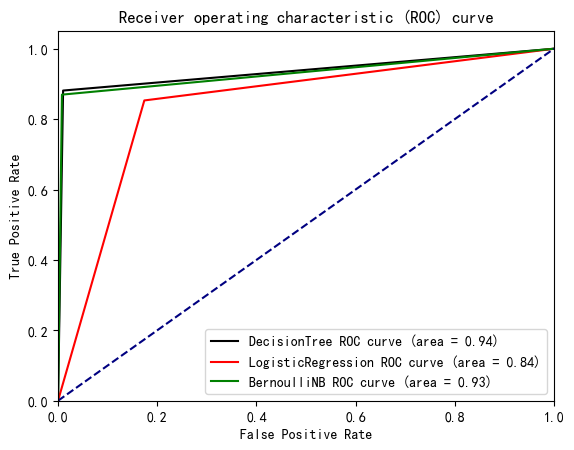

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#计算ROC值
#计算决策树模型的ROC值
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_1)
roc_auc1 = roc_auc_score(y_test, y_pred_1)

#逻辑回归模型的ROC值
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_2)
roc_auc2 = roc_auc_score(y_test, y_pred_2)

#伯努利朴素贝叶斯分类器模型的ROC值
fpr3, tpr3, thresholds3 = roc_curve(y_test, clf_p2)
roc_auc3 = roc_auc_score(y_test, clf_p2)


# 绘制ROC曲线
plt.plot(fpr1, tpr1, color='black', label='DecisionTree ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='red', label='LogisticRegression ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', label='BernoulliNB ROC curve (area = %0.2f)' % roc_auc3)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()